<a href="https://colab.research.google.com/github/Hydenx2004/Time-series-lab/blob/main/Experimentts12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_stata('air2.dta',index_col='time')

In [31]:
df.head()

,air,t
time,,
1949.000000,112,1.0
1949.083374,118,2.0
1949.166626,132,3.0
1949.250000,129,4.0
1949.333374,121,5.0


In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
model = SARIMAX(df['air'],order=(1,0,0))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [34]:
predictions = model_fit.get_prediction(start=1949, dynamic=False)
predicted_mean = predictions.predicted_mean

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Text(0, 0.5, 'Air')

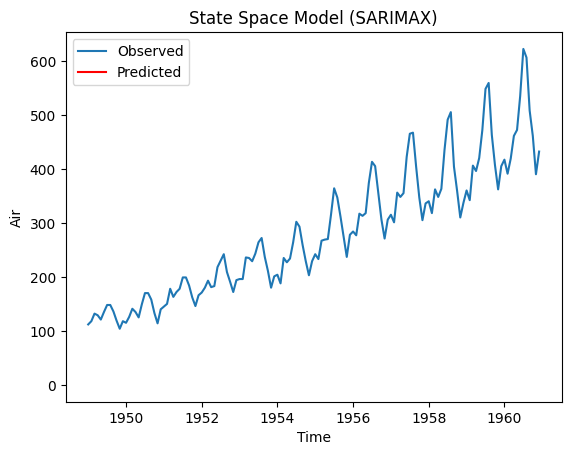

In [35]:
plt.plot(df['air'], label='Observed')
plt.plot(predicted_mean, label='Predicted', color='red')
plt.legend()
plt.title('State Space Model (SARIMAX)')
plt.xlabel('Time')
plt.ylabel('Air')